In [1]:
import cv2
import kornia as K
import kornia.feature as KF
from kornia.feature.loftr import LoFTR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import glob
import random

from kornia_moons.feature import *
from PIL import Image

In [2]:
def plot_images(ims):
    
    fig, axes = plt.subplots(3, 3, figsize=(20,20))
    
    for idx, img in enumerate(ims):
        i = idx % 3 
        j = idx // 3 
        image = Image.open(img)
        image = image.resize((300,300))
        axes[i, j].imshow(image)
        axes[i, j].set_title(img.split('/')[-1])

    plt.subplots_adjust(wspace=0, hspace=.2)
    plt.show()

In [3]:
def load_torch_image(fname):
    img = K.image_to_tensor(cv2.imread(fname), False).float() /255.
    img = K.color.bgr_to_rgb(img)
    return img

In [4]:
def match_and_draw(img_in1, img_in2):
    img1 = load_torch_image(img_in1)
    img2 = load_torch_image(img_in2)
    matcher = LoFTR(pretrained='outdoor')
    
    input_dict = {"image0": K.color.rgb_to_grayscale(img1), 
                  "image1": K.color.rgb_to_grayscale(img2)}
    
    with torch.no_grad():
        correspondences = matcher(input_dict)
    
    mkpts0 = correspondences['keypoints0'].cpu().numpy()
    mkpts1 = correspondences['keypoints1'].cpu().numpy()
    H, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
    inliers = inliers > 0
    
    draw_LAF_matches(
    KF.laf_from_center_scale_ori(torch.from_numpy(mkpts0).view(1,-1, 2),
                                torch.ones(mkpts0.shape[0]).view(1,-1, 1, 1),
                                torch.ones(mkpts0.shape[0]).view(1,-1, 1)),

    KF.laf_from_center_scale_ori(torch.from_numpy(mkpts1).view(1,-1, 2),
                                torch.ones(mkpts1.shape[0]).view(1,-1, 1, 1),
                                torch.ones(mkpts1.shape[0]).view(1,-1, 1)),
    torch.arange(mkpts0.shape[0]).view(-1,1).repeat(1,2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers,
    draw_dict={'inlier_color': (0.2, 1, 0.2),
               'tentative_color': None, 
               'feature_color': (0.2, 0.5, 1), 'vertical': False})
    return correspondences

In [5]:
def plot_matching(samples, files):
    for i in range(samples.shape[1]):
        image_1 = files[samples[0][i]]
        image_2 = files[samples[1][i]]
        print(f'Matching: {image_1} to {image_2}')
        correspondences = match_and_draw(image_1, image_2)

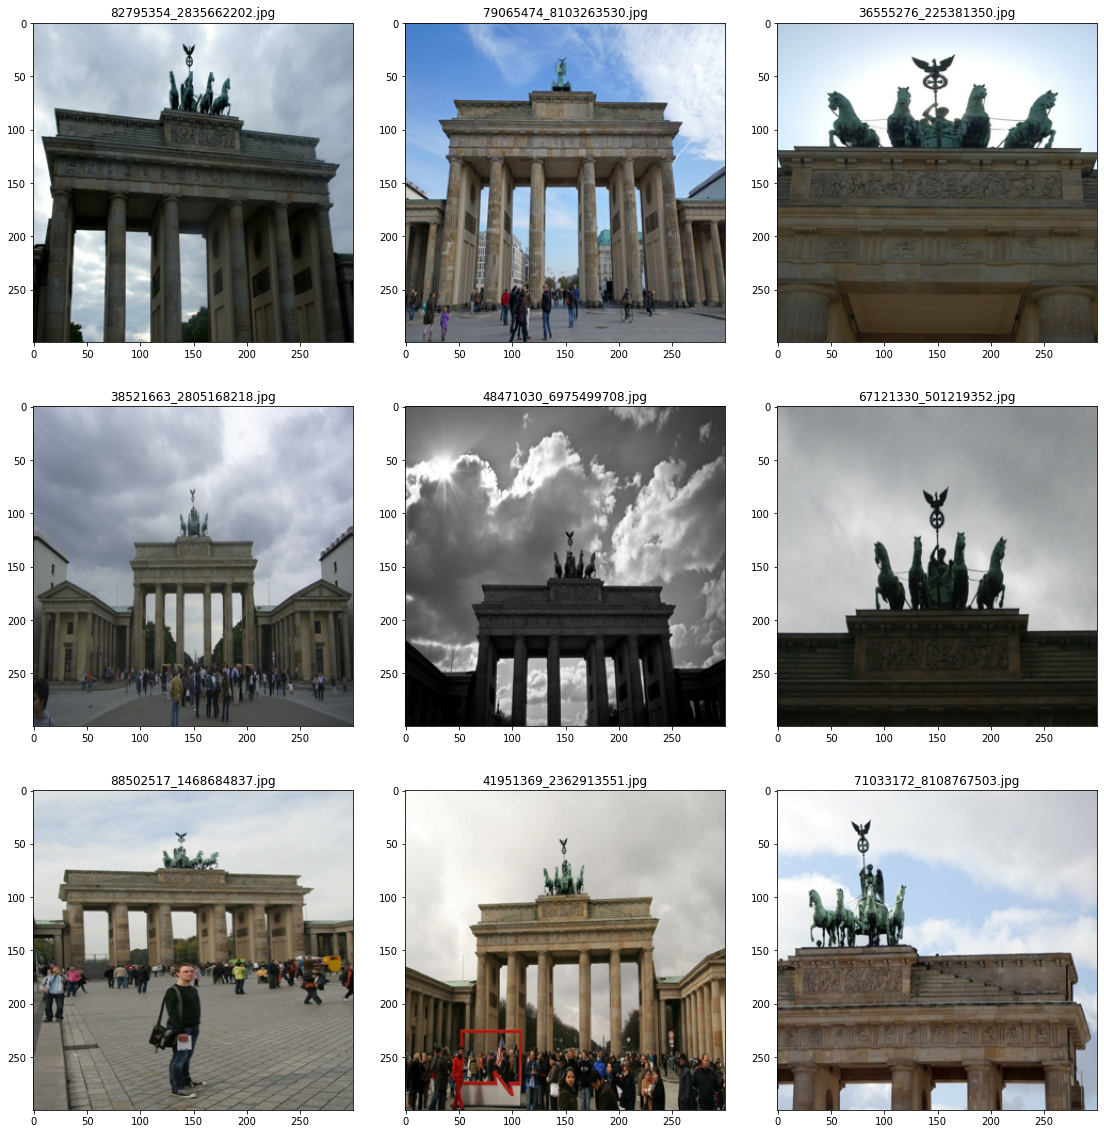

In [6]:
brandenburg_gate_path =  'data/input/train/brandenburg_gate/images/'
brandenburg_gate_files = [file for file in glob.glob(f'{brandenburg_gate_path}*.jpg')]

plot_images(random.sample(brandenburg_gate_files, 9))

Matching: data/input/train/brandenburg_gate/images/70343879_243743607.jpg to data/input/train/brandenburg_gate/images/06809631_5499605152.jpg


Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /Users/takeru.abe/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100.0%
/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:255: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:258: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep 

Matching: data/input/train/brandenburg_gate/images/76041859_6025111497.jpg to data/input/train/brandenburg_gate/images/66711799_2362913545.jpg


/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:255: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:258: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [j_ids % 

Matching: data/input/train/brandenburg_gate/images/60732645_2978928712.jpg to data/input/train/brandenburg_gate/images/18348543_5140101294.jpg


/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:255: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:258: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [j_ids % 

Matching: data/input/train/brandenburg_gate/images/11837123_2947074063.jpg to data/input/train/brandenburg_gate/images/88502517_1468684837.jpg


/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:255: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
/usr/local/lib/python3.9/site-packages/kornia/feature/loftr/utils/coarse_matching.py:258: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [j_ids % 

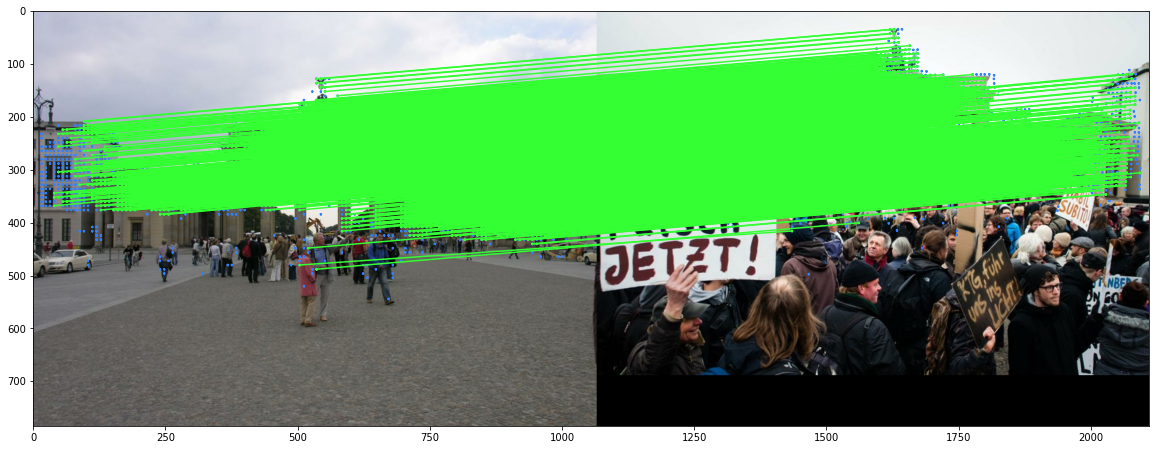

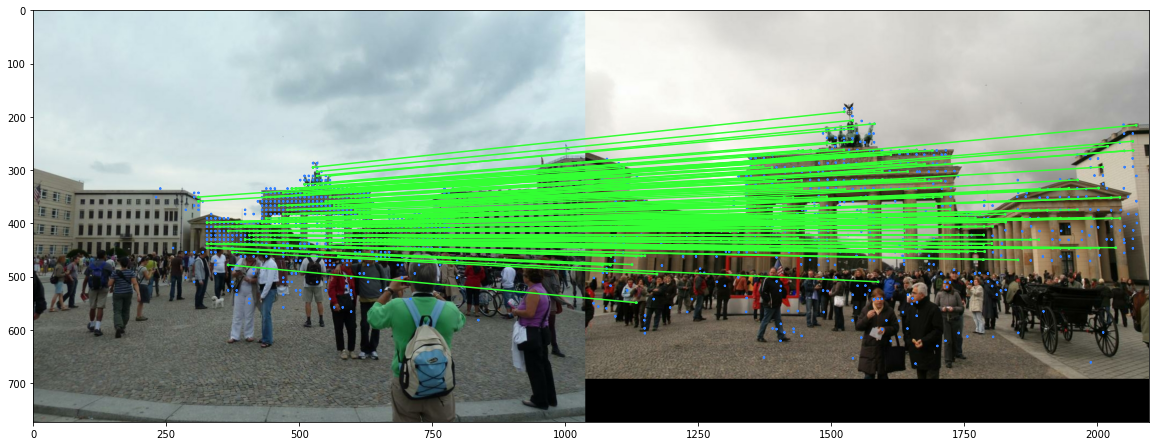

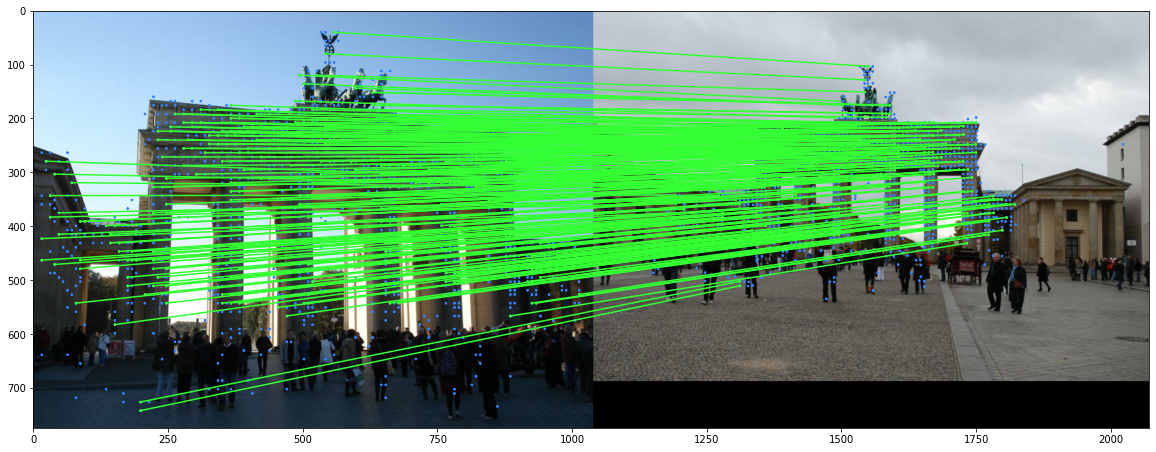

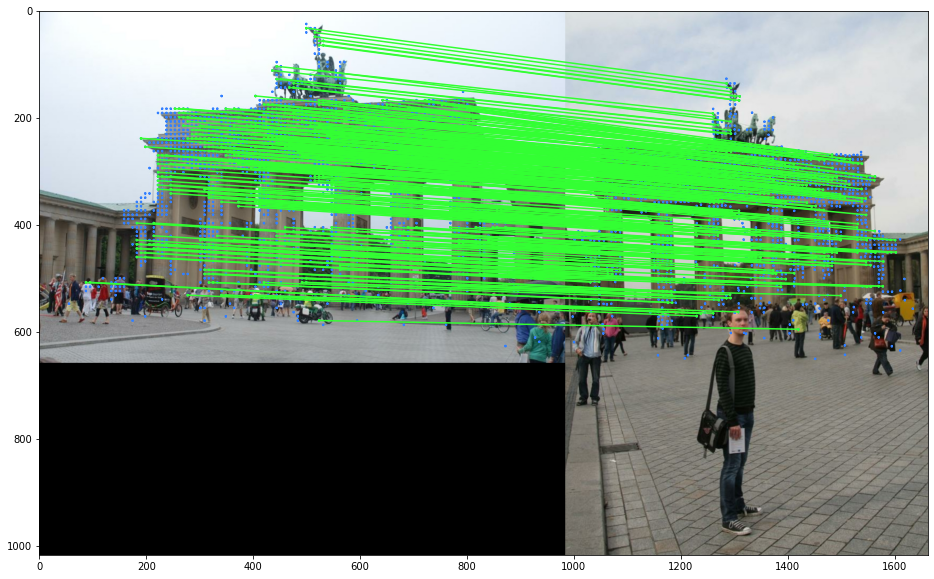

In [7]:
random_samples = np.random.randint(len(brandenburg_gate_files), size=(2, 4))

plot_matching(random_samples, brandenburg_gate_files)